In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('best-selling-manga.csv')

In [3]:
data.head()

,Manga series,Author(s),Publisher,Demographic,No. of collected volumes,Serialized,Approximate sales in million(s),Average sales per volume in million(s)
0,One Piece,Eiichiro Oda,Shueisha,Shōnen,104,1997–present,516.6,4.97
1,Golgo 13,"Takao Saito, Saito Production",Shogakukan,Seinen,207,1968–present,300.0,1.45
2,Case Closed / Detective Conan,Gosho Aoyama,Shogakukan,Shōnen,102,1994–present,270.0,2.65
3,Dragon Ball,Akira Toriyama,Shueisha,Shōnen,42,1984–1995,260.0,6.19
4,Doraemon,Fujiko F. Fujio,Shogakukan,Children,45,1969–1996,250.0,4.71


### Checking for null and duplicate values

In [4]:
data.shape

(187, 8)

In [5]:
data.isna().sum()

Manga series                              0
Author(s)                                 0
Publisher                                 0
Demographic                               0
No. of collected volumes                  0
Serialized                                0
Approximate sales in million(s)           0
Average sales per volume in million(s)    0
dtype: int64

In [6]:
data.drop_duplicates().shape

(187, 8)

##### There are no duplicates and null values 

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

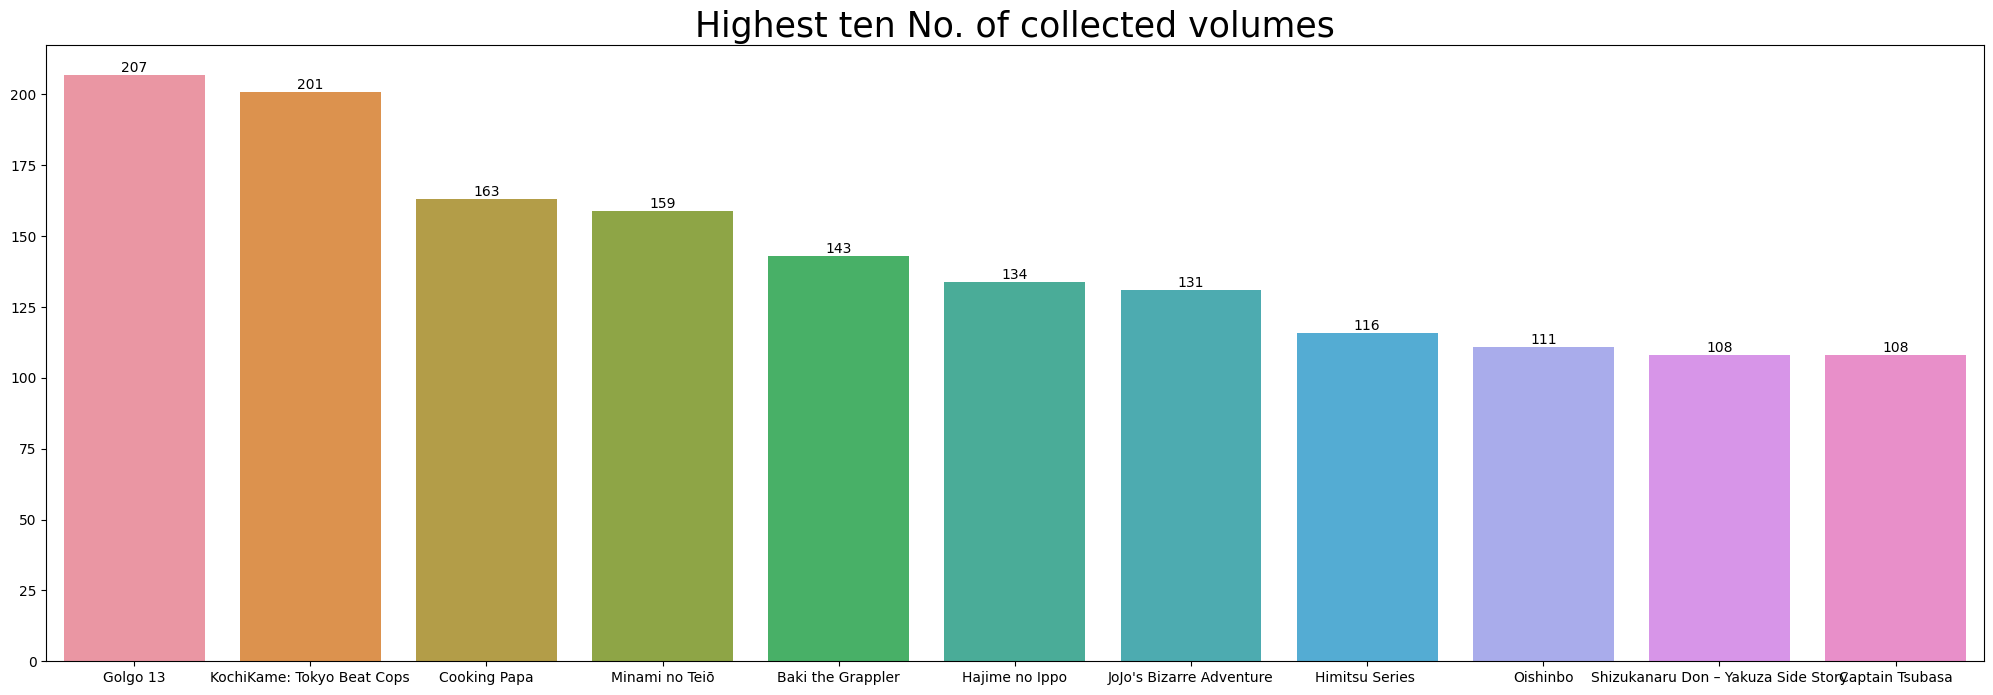

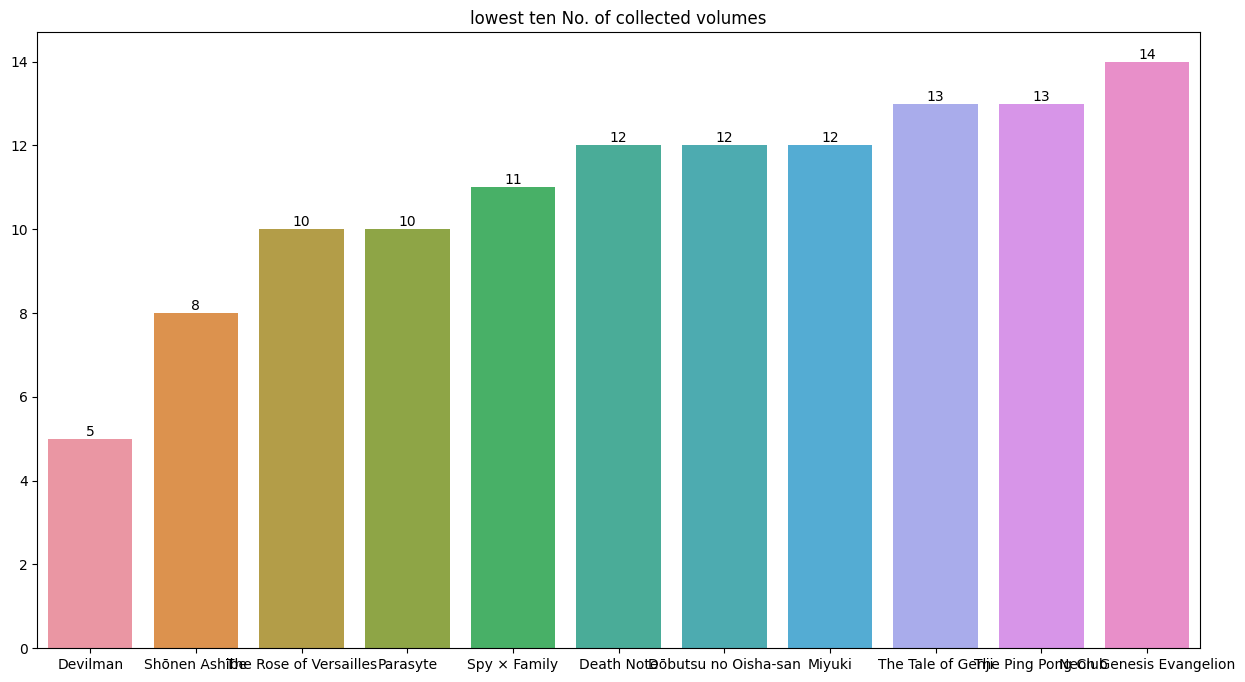

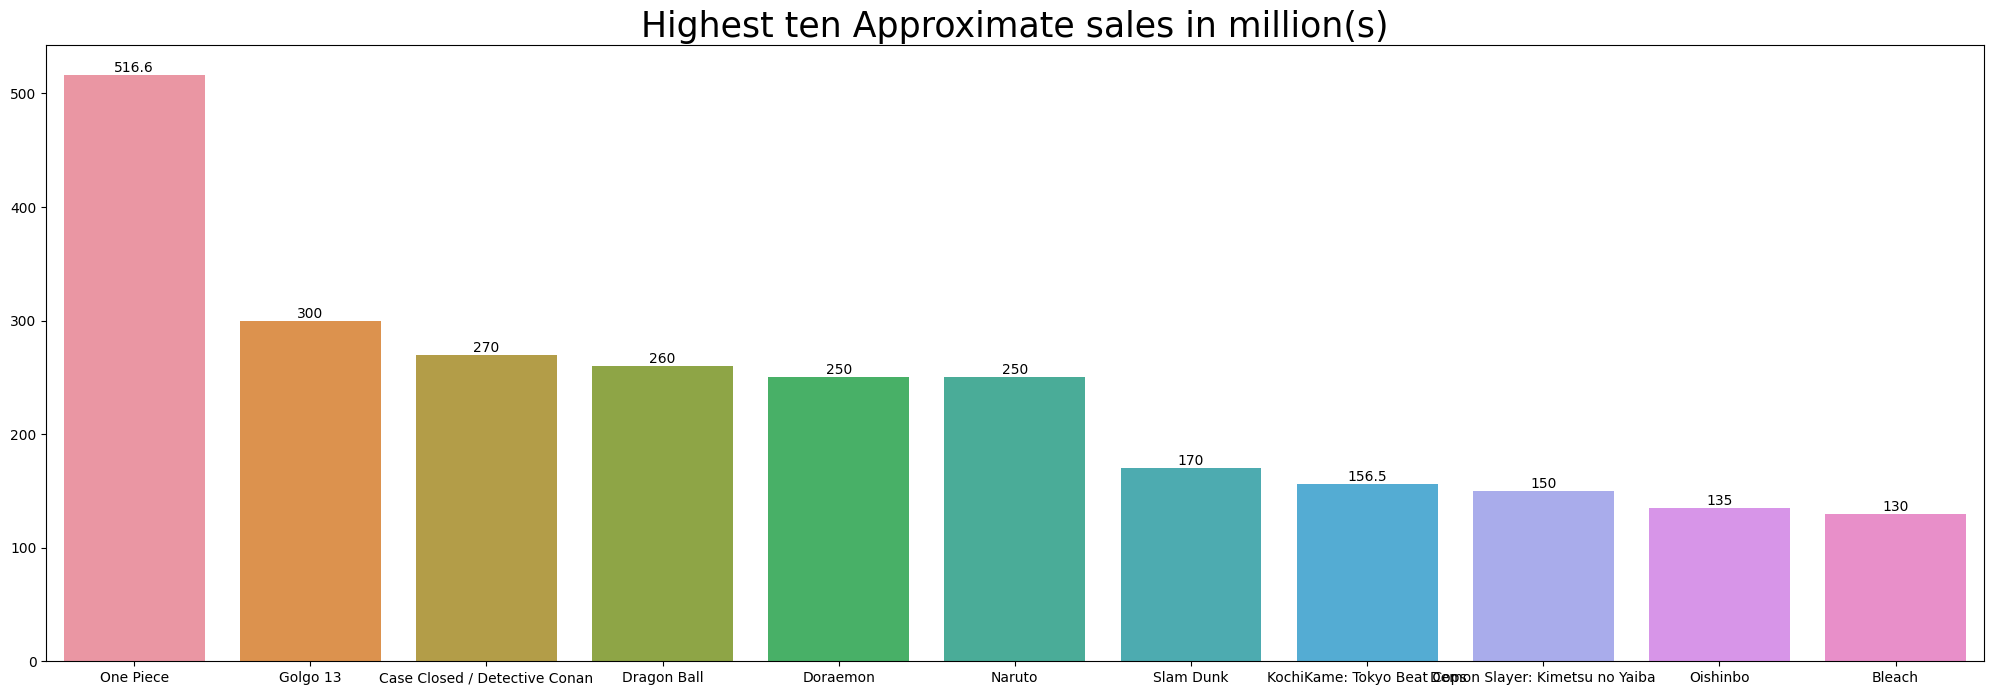

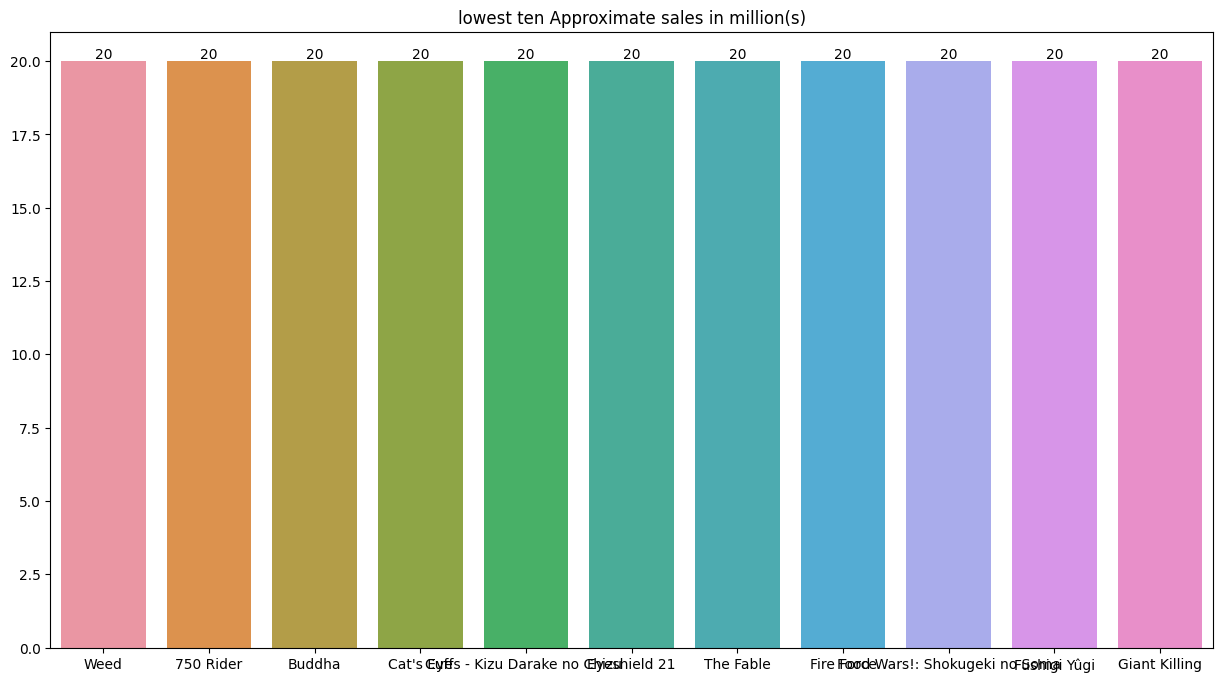

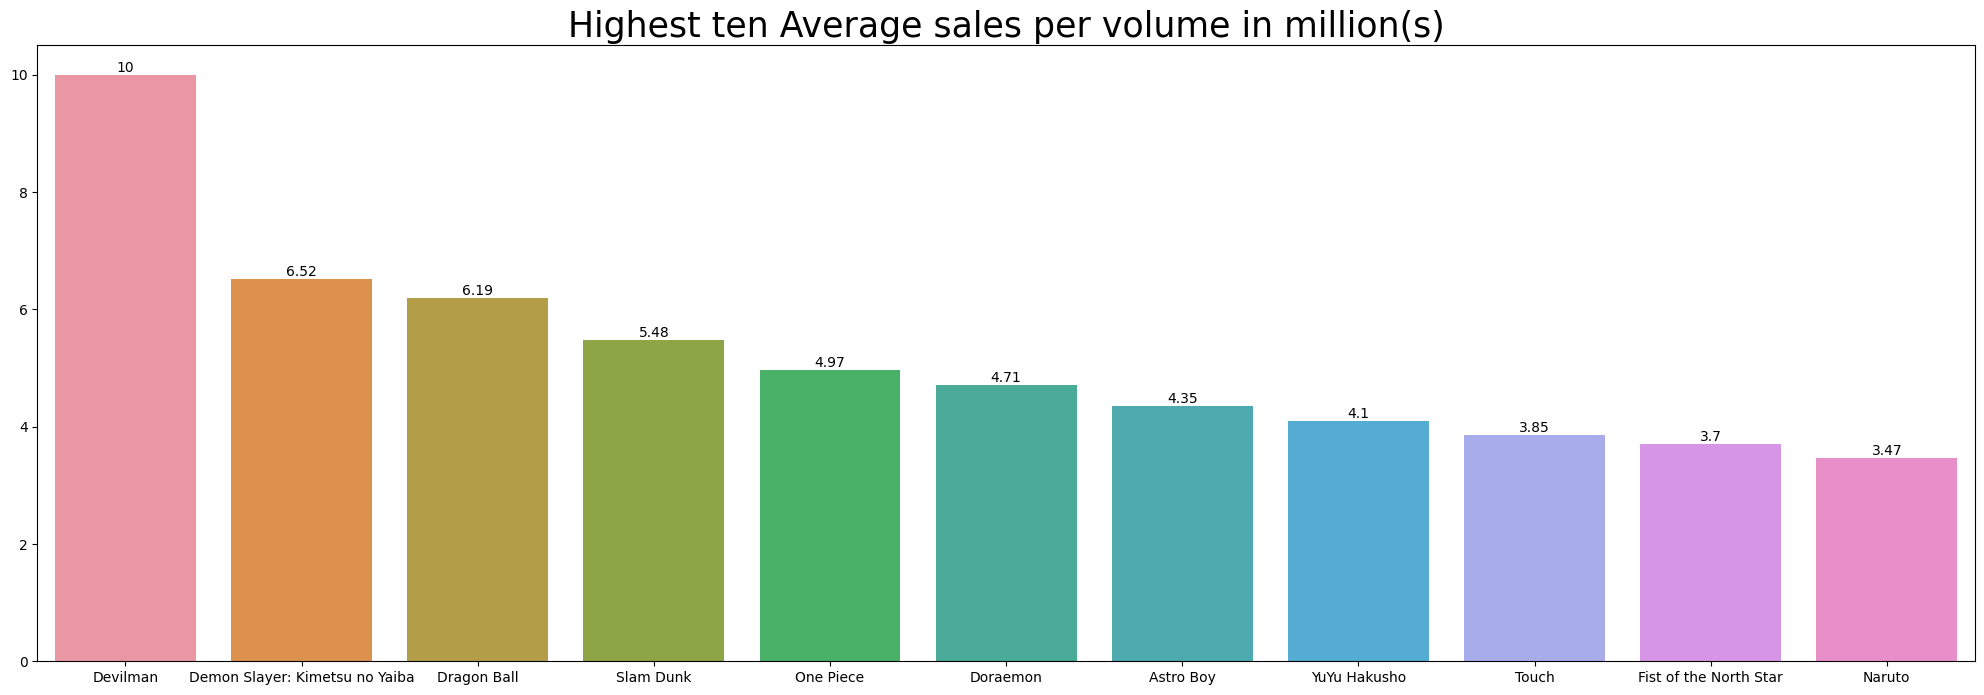

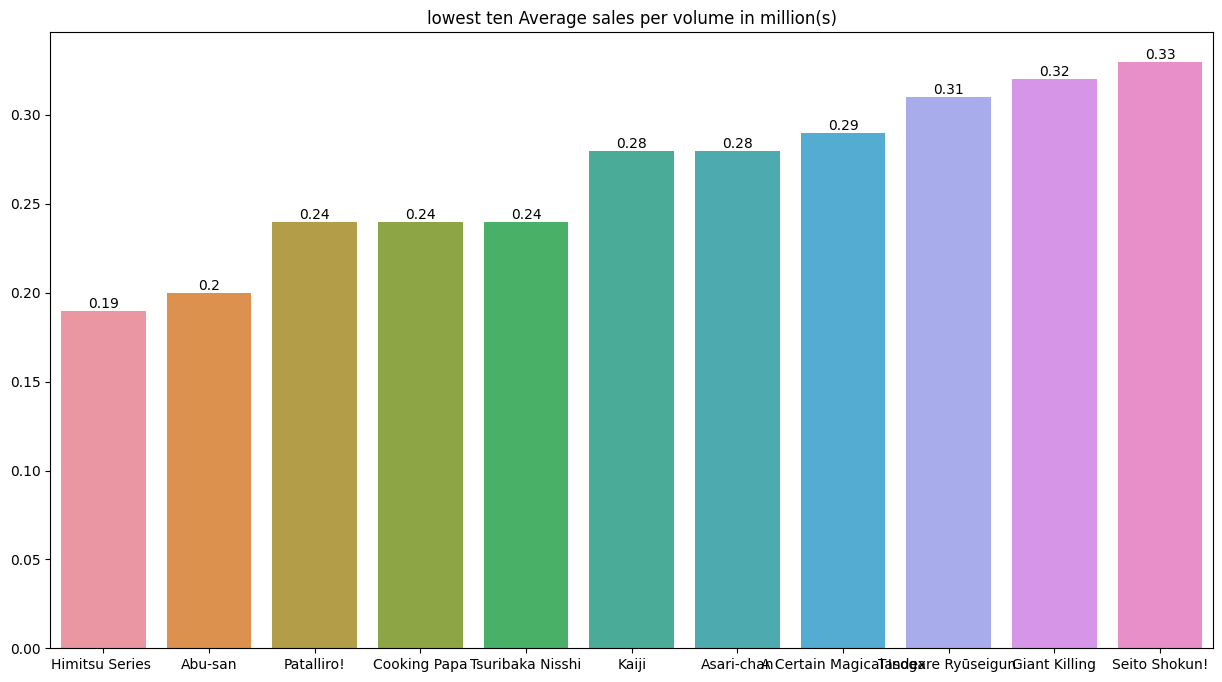

In [8]:
for col in data.describe().columns:
    plt.figure(figsize=(25,8))
    plt.title(f'Highest ten {col}',fontsize=25)
    ax=sns.barplot(y=[val for i,val in enumerate(data.sort_values(by=col,ascending=False).iloc[:,:][col]) if i<=10 ]
                ,x=[val for i,val in enumerate(data.sort_values(by=col,ascending=False).iloc[:,:]['Manga series']) if i<=10 ])
    for i in ax.containers:
        ax.bar_label(i)
    plt.show()
    plt.figure(figsize=(15,8))
    plt.title(f'lowest ten {col}')
    ax=sns.barplot(y=[val for i,val in enumerate(data.sort_values(by=col,ascending=True).iloc[:,:][col]) if i<=10 ]
                ,x=[val for i,val in enumerate(data.sort_values(by=col,ascending=True).iloc[:,:]['Manga series']) if i<=10 ])
    for i in ax.containers:
        ax.bar_label(i)
    plt.show()

#### insights :

##### No of volumes :
- Glogo (201 volumes) ,Tokyo beat cops (201) has the highest no of volumes (chapters)
- Devil man (5 volumes) has least no of volumes than all animes

##### Sales in millions
- One Piece has high domination in sales (516.6 millions sales)

##### Average sales per volume
- Devil man has got more sales per volume (10 millions per volume) even it has only 5 volumes

In [9]:
data[data.describe().columns].corr()

,No. of collected volumes,Approximate sales in million(s),Average sales per volume in million(s)
No. of collected volumes,1.000000,0.385699,-0.300739
Approximate sales in million(s),0.385699,1.000000,0.523410
Average sales per volume in million(s),-0.300739,0.523410,1.000000


<Axes: >

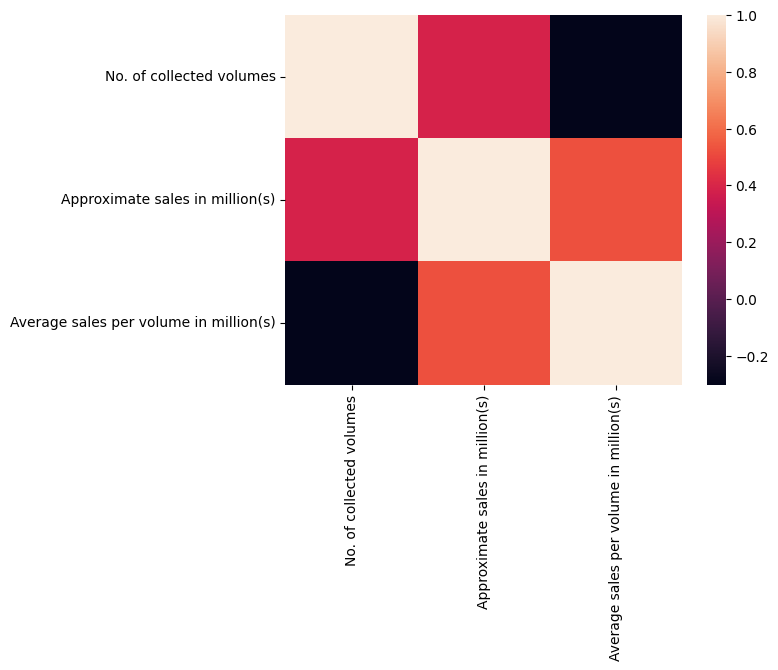

In [10]:
sns.heatmap(data[data.describe().columns].corr())

#### Average sales per volume has some correlation with total sales in millions that make sense

In [11]:
data.head()

,Manga series,Author(s),Publisher,Demographic,No. of collected volumes,Serialized,Approximate sales in million(s),Average sales per volume in million(s)
0,One Piece,Eiichiro Oda,Shueisha,Shōnen,104,1997–present,516.6,4.97
1,Golgo 13,"Takao Saito, Saito Production",Shogakukan,Seinen,207,1968–present,300.0,1.45
2,Case Closed / Detective Conan,Gosho Aoyama,Shogakukan,Shōnen,102,1994–present,270.0,2.65
3,Dragon Ball,Akira Toriyama,Shueisha,Shōnen,42,1984–1995,260.0,6.19
4,Doraemon,Fujiko F. Fujio,Shogakukan,Children,45,1969–1996,250.0,4.71


In [12]:
data['Demographic'].value_counts().index

Index(['Shōnen', 'Seinen', 'Shōjo', 'Shōnen/Seinen', 'Children', 'Josei', '—',
       'Shōjo/Josei', 'Shōnen/shōjo/Josei'],
      dtype='object', name='Demographic')

In [13]:
data[data['Demographic']==['Shōnen', 'Seinen', 'Shōjo', 'Shōnen/Seinen', 'Children', 'Josei', '—',
       'Shōjo/Josei', 'Shōnen/shōjo/Josei'][6]]

,Manga series,Author(s),Publisher,Demographic,No. of collected volumes,Serialized,Approximate sales in million(s),Average sales per volume in million(s)
20,Sazae-san,Machiko Hasegawa,Kodansha,—,45,1946–1974,86.0,1.91


In [14]:
data.drop(20,inplace=True)

In [15]:
data['Demographic'].value_counts()

Demographic
Shōnen                101
Seinen                 50
Shōjo                  21
Shōnen/Seinen           6
Children                4
Josei                   2
Shōjo/Josei             1
Shōnen/shōjo/Josei      1
Name: count, dtype: int64

In [16]:
avg_demo = []

In [17]:
data[data['Demographic']=='Children']

,Manga series,Author(s),Publisher,Demographic,No. of collected volumes,Serialized,Approximate sales in million(s),Average sales per volume in million(s)
4,Doraemon,Fujiko F. Fujio,Shogakukan,Children,45,1969–1996,250.0,4.71
112,Pokémon Adventures,"Hidenori Kusaka, Mato, Satoshi Yamamoto",Shogakukan,Children,59,1997–present,28.0,0.47
146,Himitsu Series,"Yasuko Uchiyama, Tokuo Yokota, Terumi Fujiki, ...",Gakken,Children,116,1972–2014,23.0,0.19
159,Shōnen Shōjo Nippon no Rekishi,"Kōta Kodama, Arakawa Shoji",Shogakukan,Children,24,1981–2018,20.2,0.84


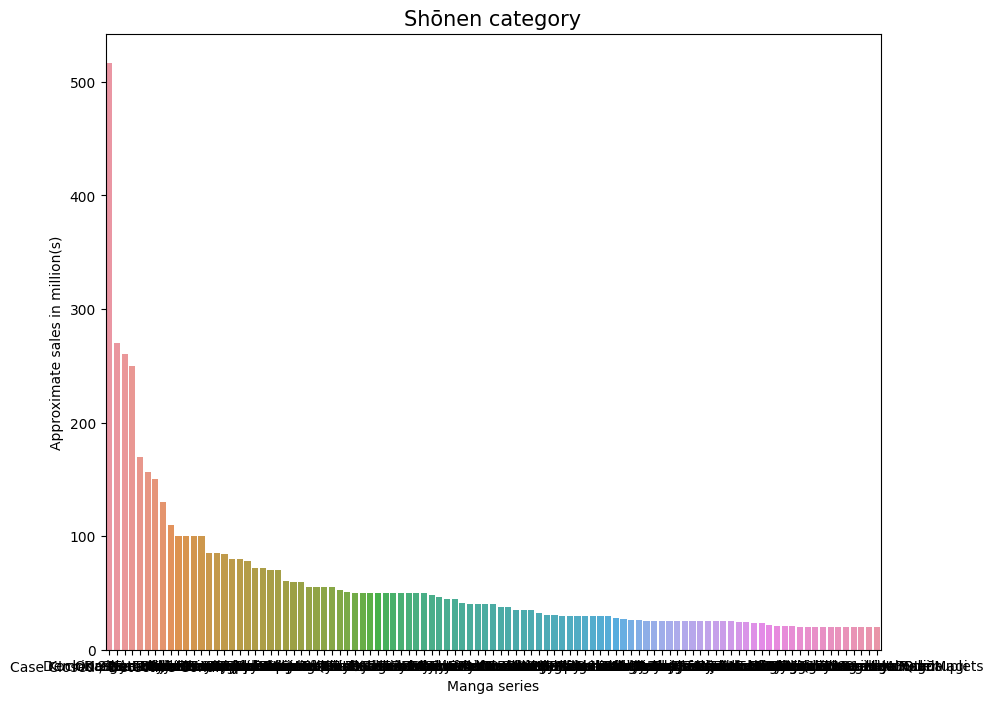

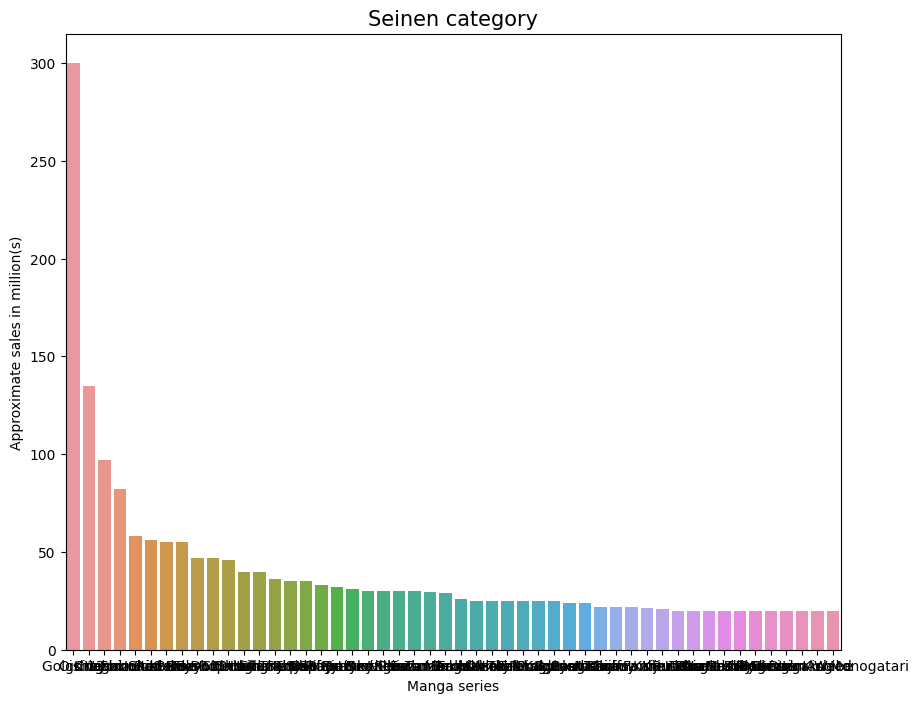

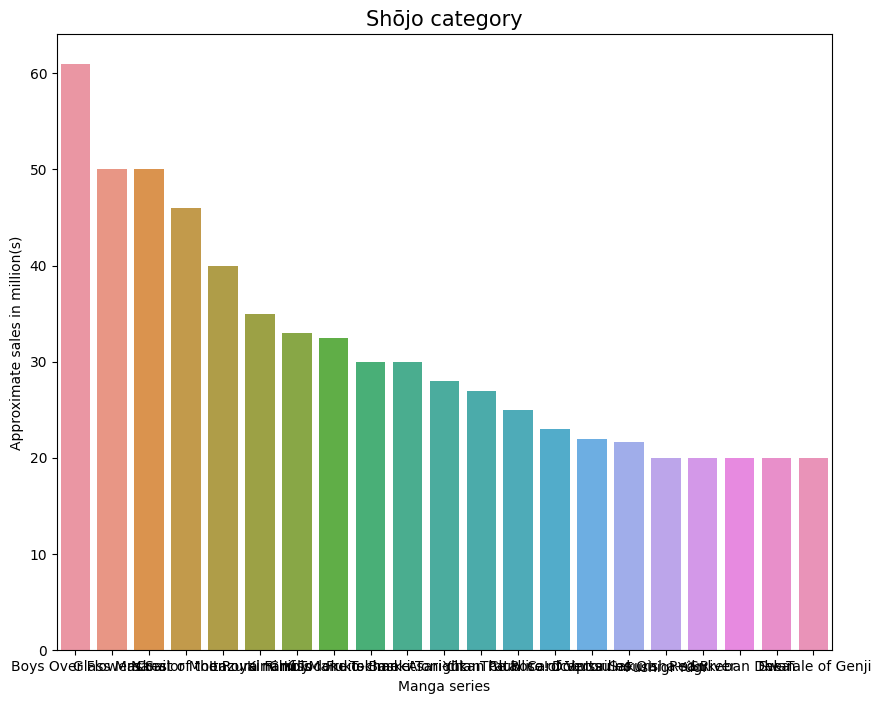

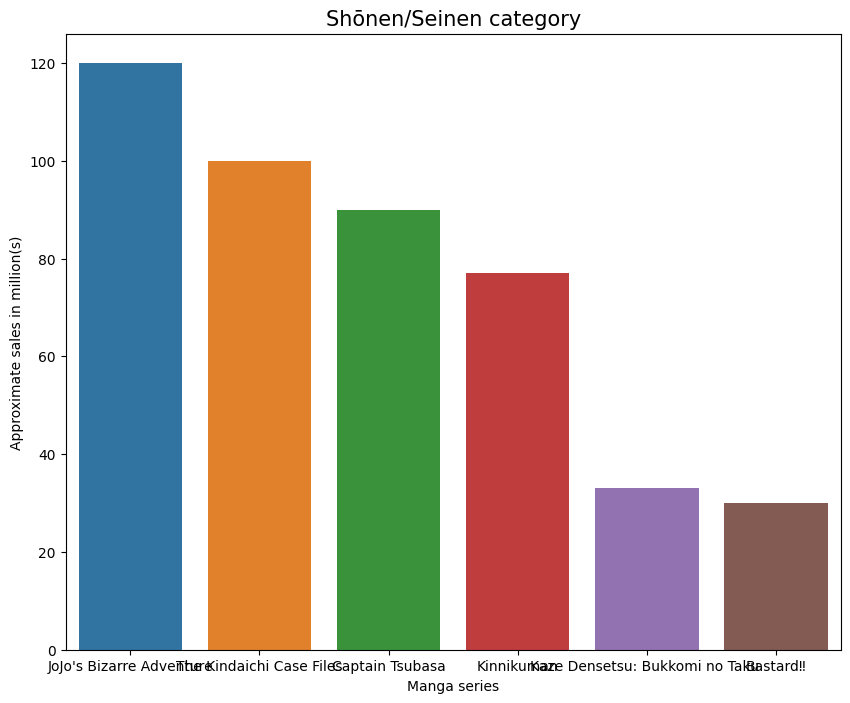

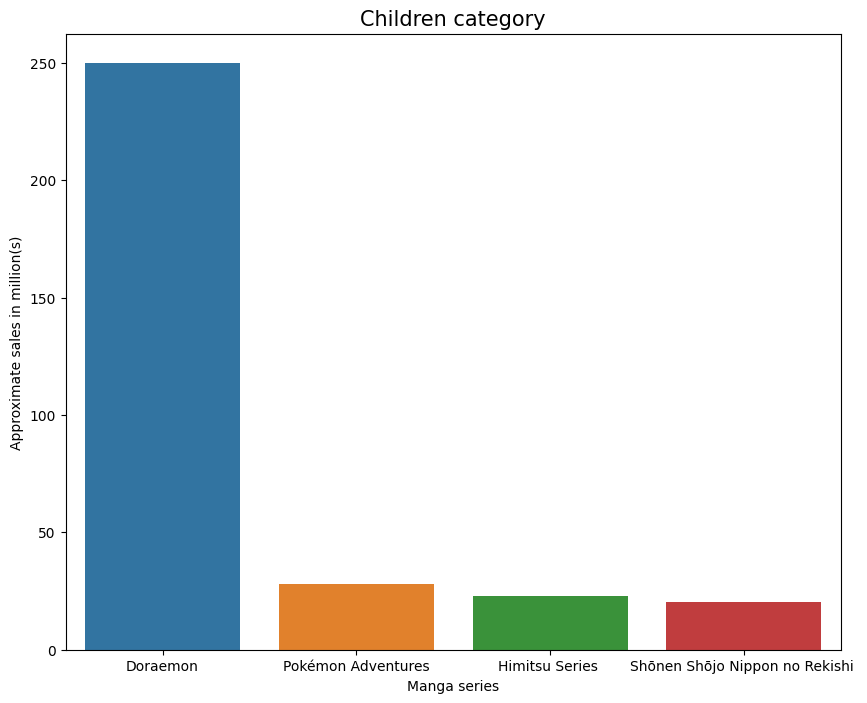

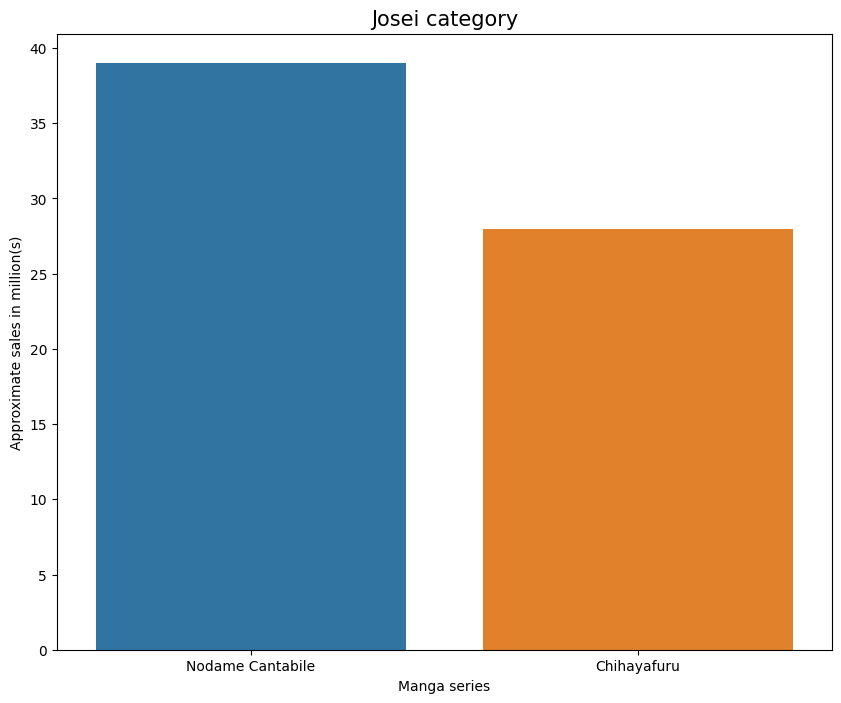

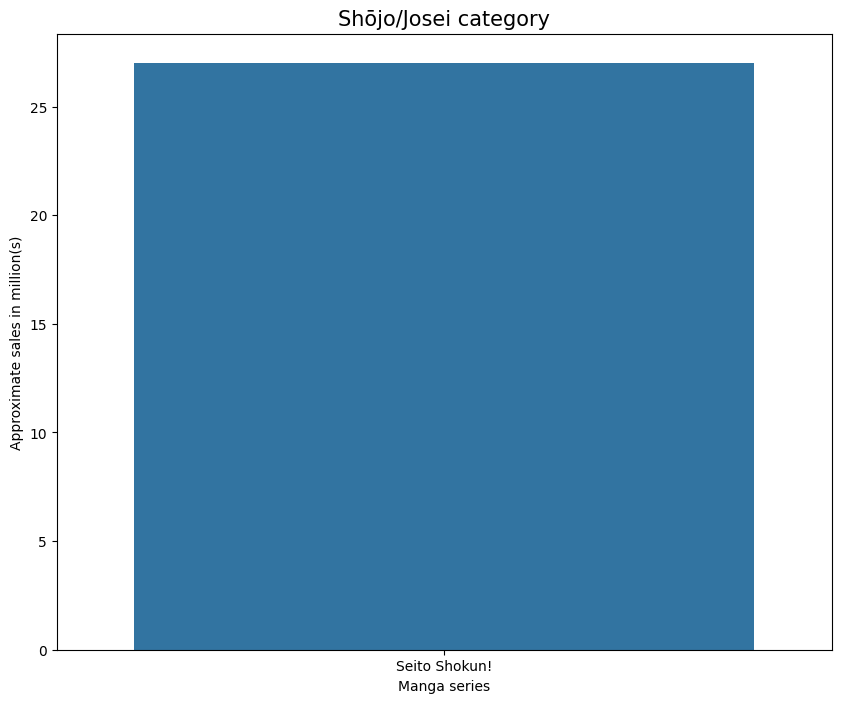

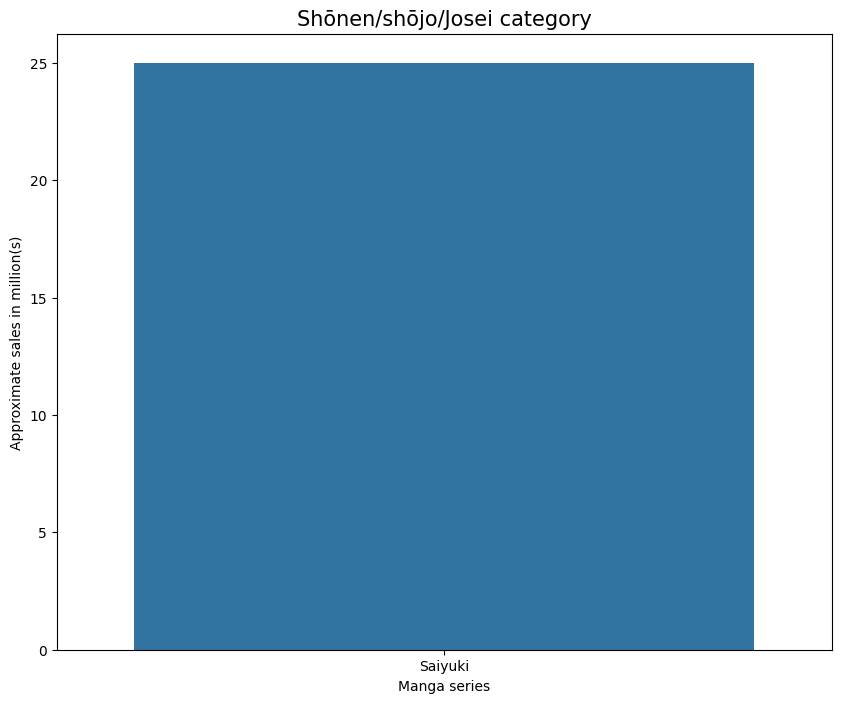

In [18]:
dem =['Shōnen', 'Seinen', 'Shōjo', 'Shōnen/Seinen', 'Children', 'Josei',
       'Shōjo/Josei', 'Shōnen/shōjo/Josei']
for col in dem:
    plt.figure(figsize=(10,8))
    plt.title(f'{col} category',fontsize=15)
    sns.barplot(data[data['Demographic']==col],x='Manga series',y='Approximate sales in million(s)')
    plt.show()

In [19]:
avg_val = []
tot_sales_dem = []

In [20]:
for col in dem:
    tot_sales_dem.append(sum([val for val in data[data['Demographic']==col]['Approximate sales in million(s)']]))
    avg_val.append(sum([val for val in data[data['Demographic']==col]['Approximate sales in million(s)']])/len([val for val in data[data['Demographic']==col]['Approximate sales in million(s)']]))

In [21]:
avg_val

[58.13168316831683, 39.8266, 31.14761904761905, 75.0, 80.3, 33.5, 27.0, 25.0]

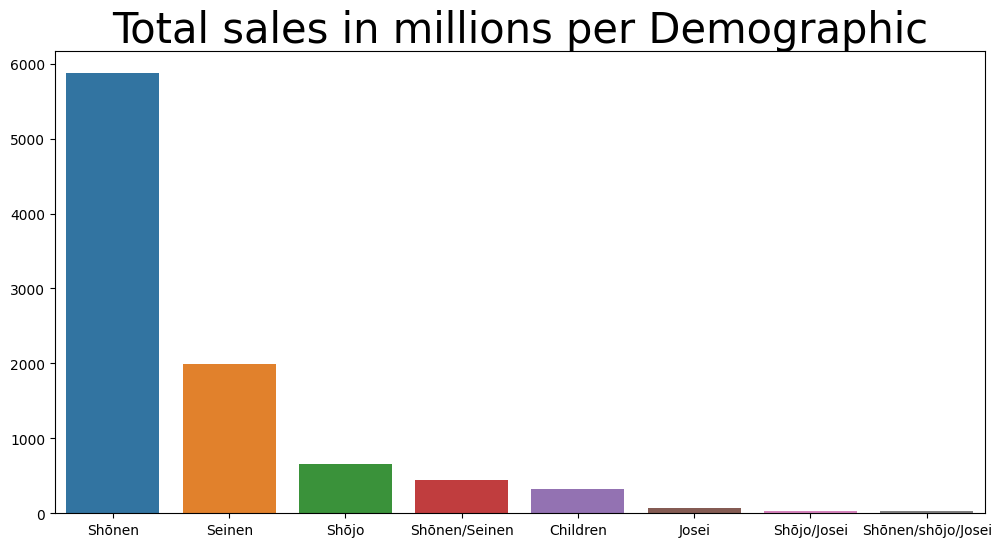

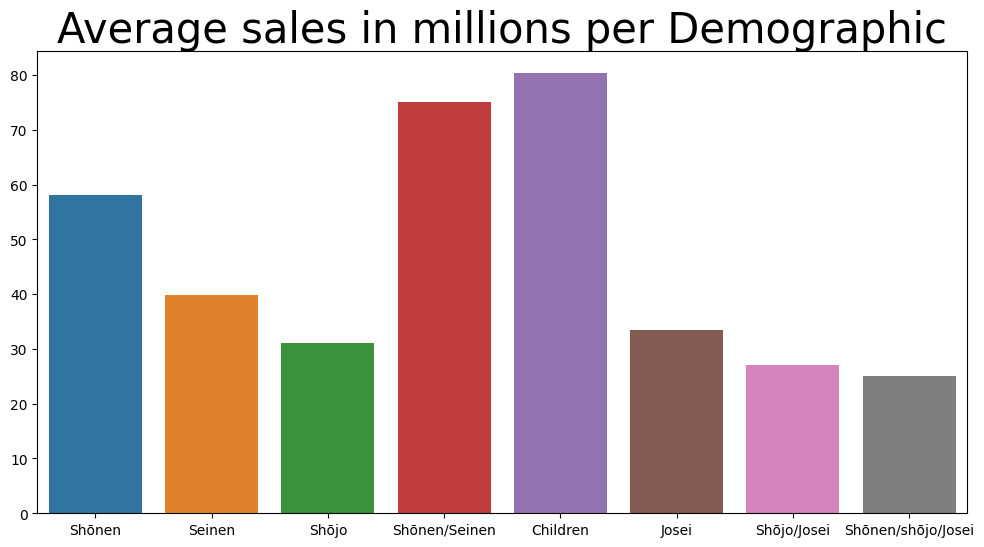

In [22]:
plt.figure(figsize=(12,6))
plt.title('Total sales in millions per Demographic',fontsize=30)
sns.barplot(x=dem,y=tot_sales_dem)
for i in ax.containers:
    ax.bar_label(i)
plt.show()
plt.figure(figsize=(12,6))
plt.title('Average sales in millions per Demographic',fontsize=30)
sns.barplot(x=dem,y=avg_val)
for i in ax.containers:
    ax.bar_label(i)
plt.show()

#### Children Demographic has has the highest average per demographic
- Because Doramon has alone contrubutied 250 Millions

In [23]:
pub = data['Publisher'].value_counts().index

In [24]:
avg_pub = []
tot_sales_pub = []
for col in pub:
    tot_sales_pub.append(sum([val for val in data[data['Publisher']==col]['Approximate sales in million(s)']]))
    avg_pub.append(sum([val for val in data[data['Publisher']==col]['Approximate sales in million(s)']])/len([val for val in data[data['Publisher']==col]['Approximate sales in million(s)']]))

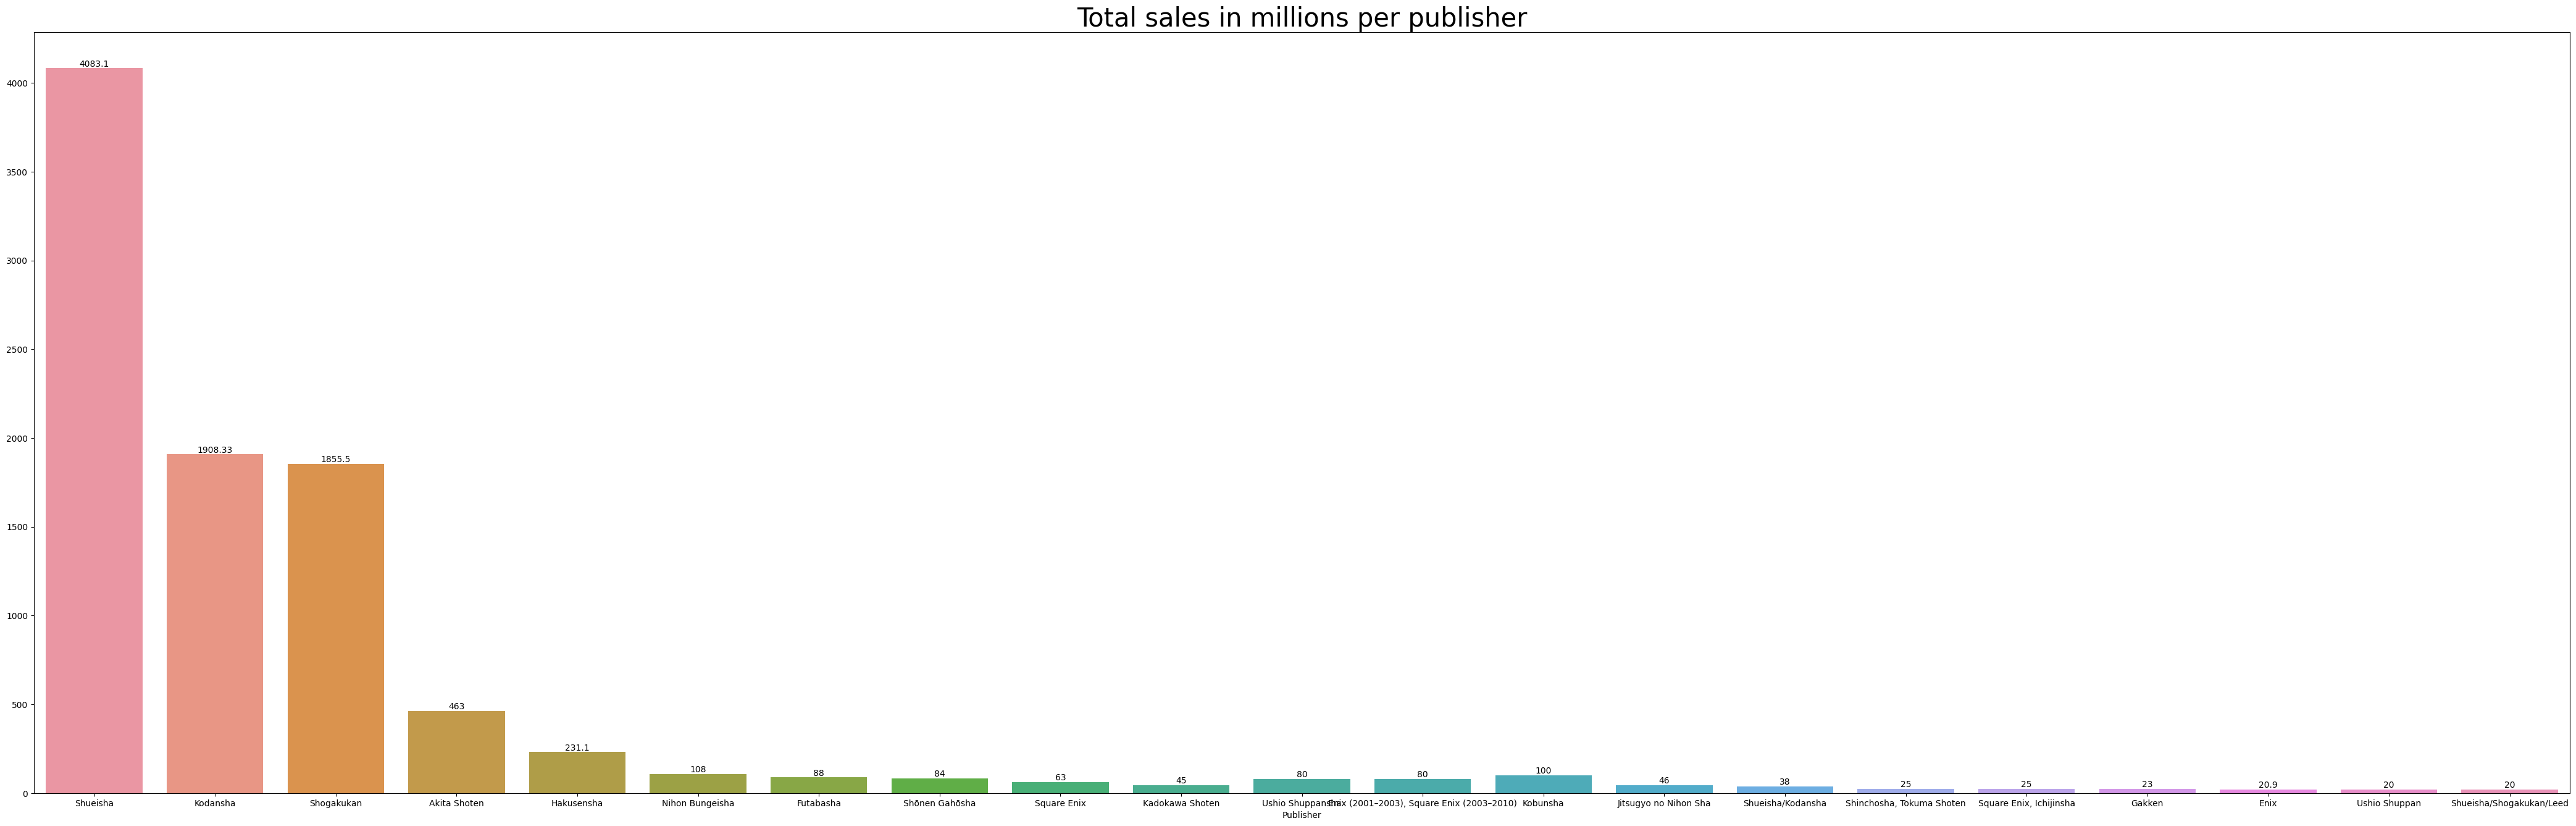

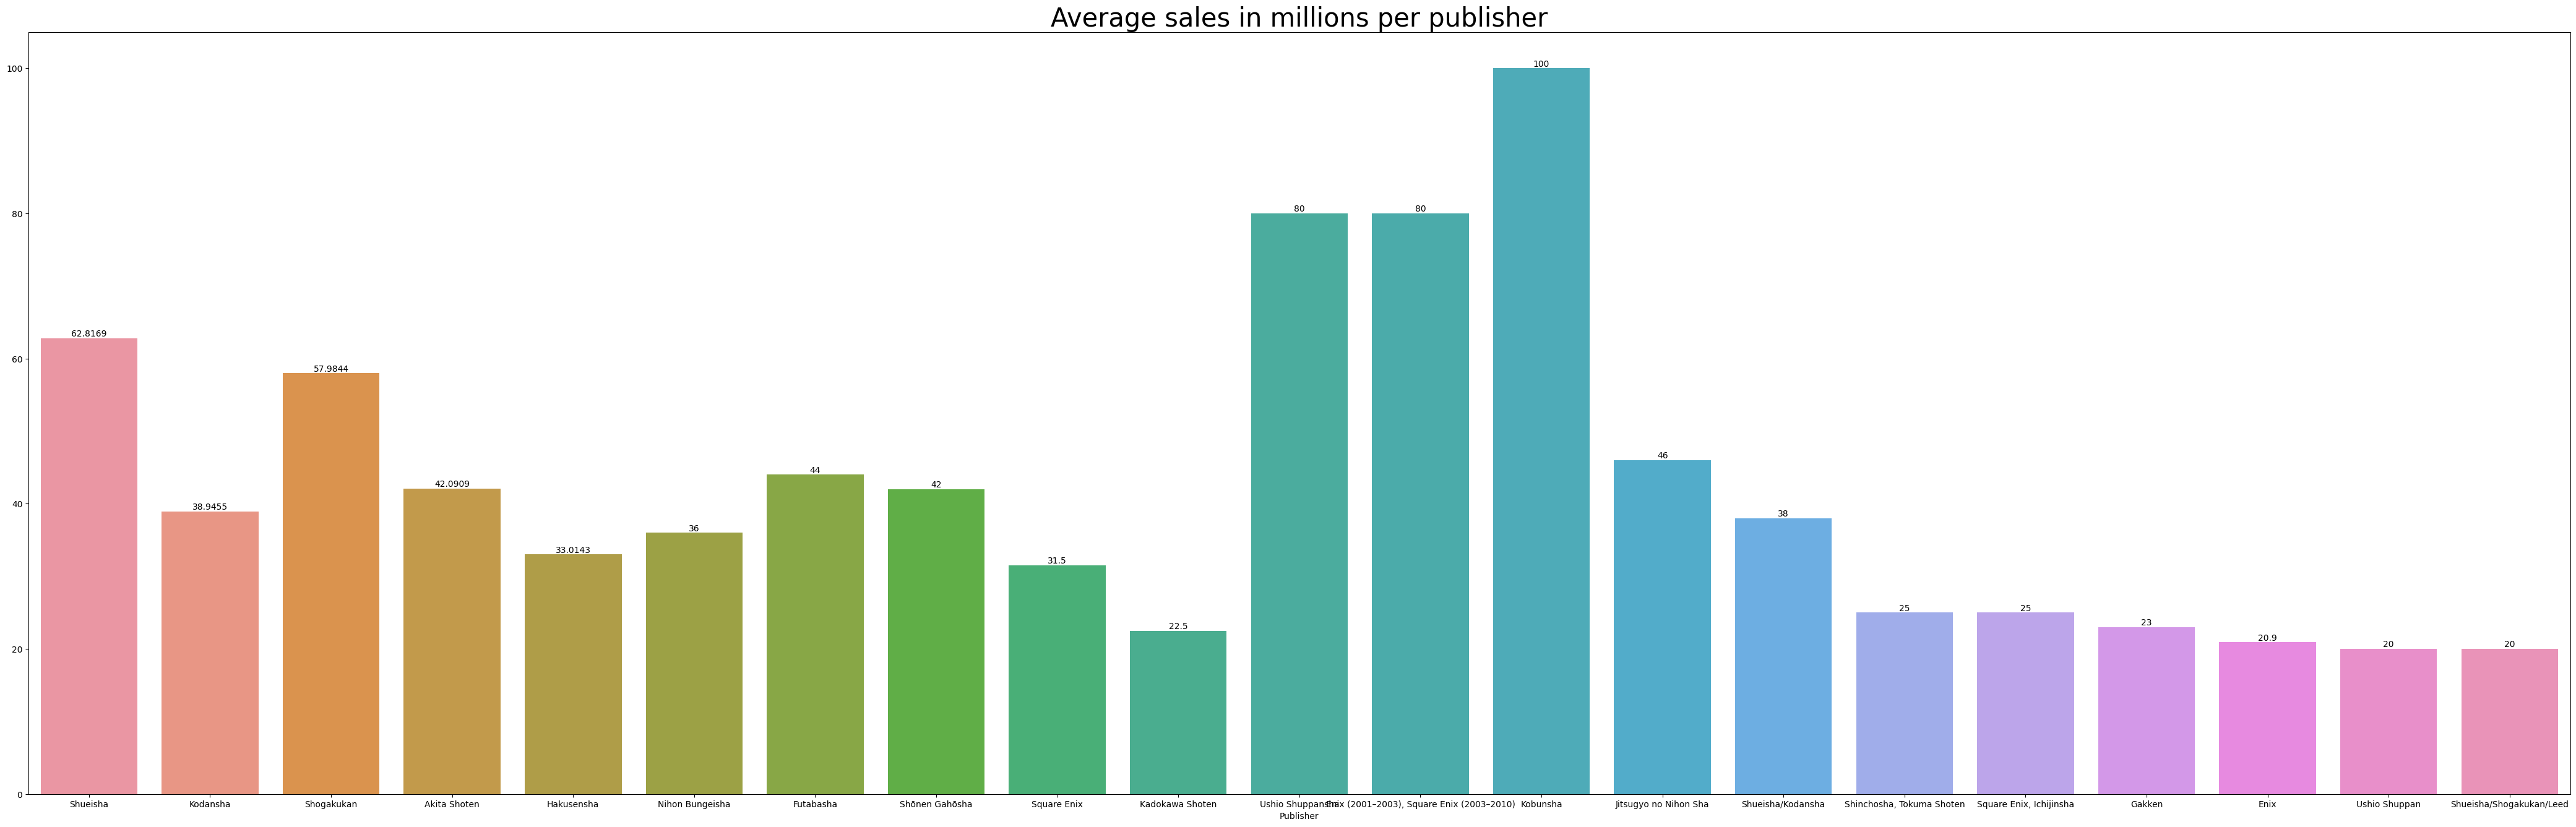

In [25]:
plt.figure(figsize=(53,16))
plt.title('Total sales in millions per publisher',fontsize=30)
ax=sns.barplot(x=pub,y=tot_sales_pub)
for i in ax.containers:
    ax.bar_label(i)
plt.show()
plt.figure(figsize=(53,16))
plt.title('Average sales in millions per publisher',fontsize=30)
ax=sns.barplot(x=pub,y=avg_pub)
for i in ax.containers:
    ax.bar_label(i)
plt.show()

#### Kobunsha Publisher has highest average sales in millions

In [26]:
data.head()

,Manga series,Author(s),Publisher,Demographic,No. of collected volumes,Serialized,Approximate sales in million(s),Average sales per volume in million(s)
0,One Piece,Eiichiro Oda,Shueisha,Shōnen,104,1997–present,516.6,4.97
1,Golgo 13,"Takao Saito, Saito Production",Shogakukan,Seinen,207,1968–present,300.0,1.45
2,Case Closed / Detective Conan,Gosho Aoyama,Shogakukan,Shōnen,102,1994–present,270.0,2.65
3,Dragon Ball,Akira Toriyama,Shueisha,Shōnen,42,1984–1995,260.0,6.19
4,Doraemon,Fujiko F. Fujio,Shogakukan,Children,45,1969–1996,250.0,4.71


In [27]:
data['Serialized'].value_counts()

Serialized
1997–present             4
1990–1996                3
1989–present             3
1991–1997                3
2018–present             3
                        ..
1972–1981                1
1990–2003                1
1986–1990                1
2000–2009 (on hiatus)    1
1999–2009                1
Name: count, Length: 153, dtype: int64

In [28]:
for val in dem:
    data[val] = [0 for _ in range(len(data))]

In [29]:
data = data.reset_index().drop('index',axis=1).copy()

In [30]:
for i,val in enumerate(data['Demographic']):
    data.loc[i,val] = 1

In [31]:
data.head()

,Manga series,Author(s),Publisher,Demographic,No. of collected volumes,Serialized,Approximate sales in million(s),Average sales per volume in million(s),Shōnen,Seinen,Shōjo,Shōnen/Seinen,Children,Josei,Shōjo/Josei,Shōnen/shōjo/Josei
0,One Piece,Eiichiro Oda,Shueisha,Shōnen,104,1997–present,516.6,4.97,1,0,0,0,0,0,0,0
1,Golgo 13,"Takao Saito, Saito Production",Shogakukan,Seinen,207,1968–present,300.0,1.45,0,1,0,0,0,0,0,0
2,Case Closed / Detective Conan,Gosho Aoyama,Shogakukan,Shōnen,102,1994–present,270.0,2.65,1,0,0,0,0,0,0,0
3,Dragon Ball,Akira Toriyama,Shueisha,Shōnen,42,1984–1995,260.0,6.19,1,0,0,0,0,0,0,0
4,Doraemon,Fujiko F. Fujio,Shogakukan,Children,45,1969–1996,250.0,4.71,0,0,0,0,1,0,0,0


In [32]:
for val in pub:
    data[val] = [0 for _ in range(len(data))]
for i,val in enumerate(data['Publisher']):
    data.loc[i,val] = 1

In [33]:
data.shape

(186, 37)

In [34]:
data.drop(['Publisher','Demographic'],axis=1,inplace=True)

In [35]:
data.shape

(186, 35)

In [36]:
data.head()

,Manga series,Author(s),No. of collected volumes,Serialized,Approximate sales in million(s),Average sales per volume in million(s),Shōnen,Seinen,Shōjo,Shōnen/Seinen,...,"Enix (2001–2003), Square Enix (2003–2010)",Kobunsha,Jitsugyo no Nihon Sha,Shueisha/Kodansha,"Shinchosha, Tokuma Shoten","Square Enix, Ichijinsha",Gakken,Enix,Ushio Shuppan,Shueisha/Shogakukan/Leed
0,One Piece,Eiichiro Oda,104,1997–present,516.6,4.97,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Golgo 13,"Takao Saito, Saito Production",207,1968–present,300.0,1.45,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Case Closed / Detective Conan,Gosho Aoyama,102,1994–present,270.0,2.65,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Dragon Ball,Akira Toriyama,42,1984–1995,260.0,6.19,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Doraemon,Fujiko F. Fujio,45,1969–1996,250.0,4.71,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
for col in ['Manga series','Author(s)','Serialized']:
    category_means = data.groupby(col)['Approximate sales in million(s)'].mean()
    # Map the category means to the original DataFrame
    data[f'Category_Encoded_{col}'] = data[col].map(category_means)

In [38]:
data.head()

,Manga series,Author(s),No. of collected volumes,Serialized,Approximate sales in million(s),Average sales per volume in million(s),Shōnen,Seinen,Shōjo,Shōnen/Seinen,...,Shueisha/Kodansha,"Shinchosha, Tokuma Shoten","Square Enix, Ichijinsha",Gakken,Enix,Ushio Shuppan,Shueisha/Shogakukan/Leed,Category_Encoded_Manga series,Category_Encoded_Author(s),Category_Encoded_Serialized
0,One Piece,Eiichiro Oda,104,1997–present,516.6,4.97,1,0,0,0,...,0,0,0,0,0,0,0,516.6,516.6,149.775
1,Golgo 13,"Takao Saito, Saito Production",207,1968–present,300.0,1.45,0,1,0,0,...,0,0,0,0,0,0,0,300.0,300.0,300.000
2,Case Closed / Detective Conan,Gosho Aoyama,102,1994–present,270.0,2.65,1,0,0,0,...,0,0,0,0,0,0,0,270.0,270.0,165.250
3,Dragon Ball,Akira Toriyama,42,1984–1995,260.0,6.19,1,0,0,0,...,0,0,0,0,0,0,0,260.0,147.5,260.000
4,Doraemon,Fujiko F. Fujio,45,1969–1996,250.0,4.71,0,0,0,0,...,0,0,0,0,0,0,0,250.0,250.0,250.000


In [39]:
data.drop(['Manga series','Author(s)','Serialized'],axis=1,inplace=True)

In [40]:
data.head()

,No. of collected volumes,Approximate sales in million(s),Average sales per volume in million(s),Shōnen,Seinen,Shōjo,Shōnen/Seinen,Children,Josei,Shōjo/Josei,...,Shueisha/Kodansha,"Shinchosha, Tokuma Shoten","Square Enix, Ichijinsha",Gakken,Enix,Ushio Shuppan,Shueisha/Shogakukan/Leed,Category_Encoded_Manga series,Category_Encoded_Author(s),Category_Encoded_Serialized
0,104,516.6,4.97,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,516.6,516.6,149.775
1,207,300.0,1.45,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,300.0,300.0,300.000
2,102,270.0,2.65,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,270.0,270.0,165.250
3,42,260.0,6.19,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,260.0,147.5,260.000
4,45,250.0,4.71,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,250.0,250.0,250.000


In [41]:
data.describe()

,No. of collected volumes,Approximate sales in million(s),Average sales per volume in million(s),Shōnen,Seinen,Shōjo,Shōnen/Seinen,Children,Josei,Shōjo/Josei,...,Shueisha/Kodansha,"Shinchosha, Tokuma Shoten","Square Enix, Ichijinsha",Gakken,Enix,Ushio Shuppan,Shueisha/Shogakukan/Leed,Category_Encoded_Manga series,Category_Encoded_Author(s),Category_Encoded_Serialized
count,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,...,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000
mean,46.053763,50.574892,1.374516,0.543011,0.268817,0.112903,0.032258,0.021505,0.010753,0.005376,...,0.005376,0.005376,0.005376,0.005376,0.005376,0.005376,0.005376,50.574892,50.574892,50.574892
std,34.771801,57.273482,1.242740,0.499491,0.444541,0.317329,0.177162,0.145453,0.103415,0.073324,...,0.073324,0.073324,0.073324,0.073324,0.073324,0.073324,0.073324,57.273482,55.368481,45.156910
min,5.000000,20.000000,0.190000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,20.000000,20.000000
25%,23.250000,24.250000,0.670000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.250000,25.000000,25.000000
50%,34.000000,30.500000,1.030000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.500000,32.750000,34.165000
75%,56.750000,50.000000,1.637500,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,50.000000,54.375000
max,207.000000,516.600000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,516.600000,516.600000,300.000000


In [42]:
x = data.drop('Approximate sales in million(s)',axis=1)
y= data['Approximate sales in million(s)']

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=45)

In [44]:
y_train.shape,y_train.shape

((148,), (148,))

In [45]:
from sklearn.linear_model import LinearRegression,PassiveAggressiveRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [46]:
models = {"Linear Regression":LinearRegression(),'DecisionTreeRegressor':DecisionTreeRegressor(),
          'RandomForestRegressor':RandomForestRegressor(),'SVC':SVR(),'KNeighborsRegressor':KNeighborsRegressor()
          ,'PassiveAgressiveRegressor':PassiveAggressiveRegressor()}

In [47]:
from sklearn.metrics import r2_score
models_accuracy = []
models_cv = []

In [48]:
import numpy as np
from sklearn.model_selection import cross_val_score
for model_name,imported_model in models.items():
    model = imported_model
    model.fit(x_train,y_train)
    print(f'R2_score of {model_name} : ',r2_score(y_test,model.predict(x_test)))
    models_accuracy.append(r2_score(y_test,model.predict(x_test)))
    score = cross_val_score(model,x_train,y_train,cv=3)
    print(f'Cross validaion for {model_name}',np.mean(score))
    models_cv.append(np.mean(score))
    print('\n')

R2_score of Linear Regression :  1.0
Cross validaion for Linear Regression 1.0


R2_score of DecisionTreeRegressor :  0.7583778319018913
Cross validaion for DecisionTreeRegressor 0.9413109701251265


R2_score of RandomForestRegressor :  0.6901200844391302
Cross validaion for RandomForestRegressor 0.963979034094009


R2_score of SVC :  0.02932174970626389
Cross validaion for SVC 0.09265065135086666


R2_score of KNeighborsRegressor :  0.732615143851048
Cross validaion for KNeighborsRegressor 0.8625904719384719


R2_score of PassiveAgressiveRegressor :  0.9999954951496035
Cross validaion for PassiveAgressiveRegressor 0.9999983590978166




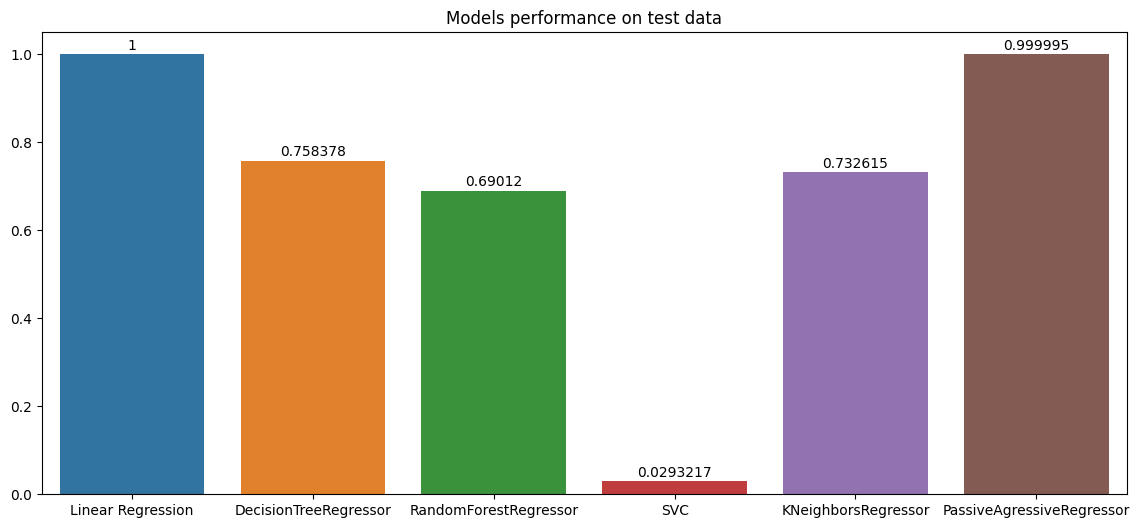

In [49]:
plt.figure(figsize=(14,6))
plt.title('Models performance on test data')
ax = sns.barplot(x=[i for i in models.keys()],y=models_accuracy)
for i in ax.containers: ax.bar_label(i,padding=1)

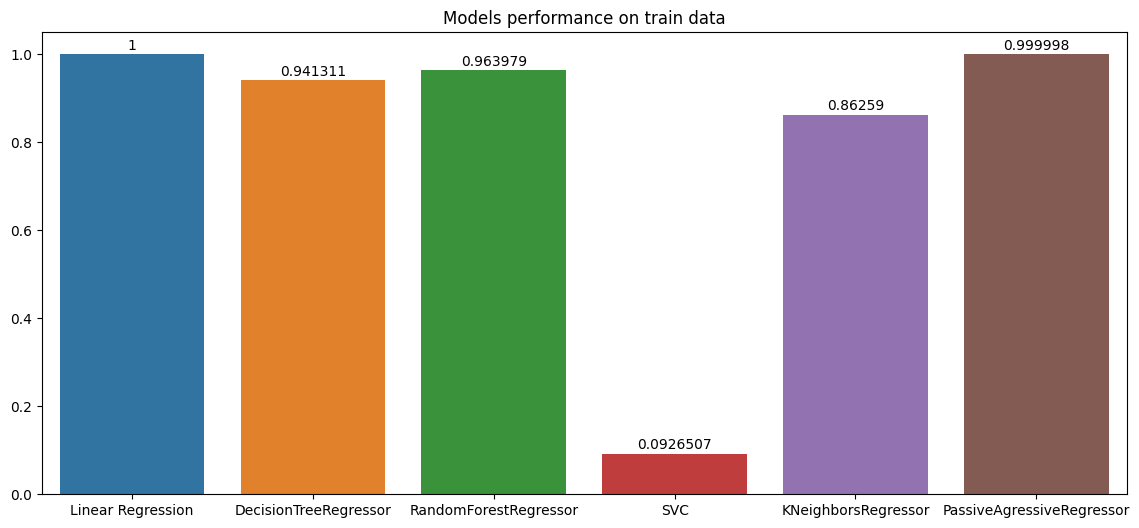

In [50]:
plt.figure(figsize=(14,6))
plt.title('Models performance on train data')
ax = sns.barplot(x=[i for i in models.keys()],y=models_cv)
for i in ax.containers: ax.bar_label(i,padding=1)

In [51]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score, mean_squared_log_error, mean_absolute_percentage_error, explained_variance_score

In [52]:
y_pred = model.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmsle = mean_squared_log_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)

# Print the calculated metrics
print("Mean Absolute Error:", mae*100,'%')
print("Mean Squared Error:", mse*100,'%')
print("Median Absolute Error:", medae*100,'%')
print("R-squared:", r2*100,'%')
print("Root Mean Squared Log Error:", rmsle*100,'%')
print("Mean Absolute Percentage Error:", mape*100,'%')
print("Explained Variance Score:", evs*100,'%')

Mean Absolute Error: 6.717178270633707 %
Mean Squared Error: 3.4088017515356976 %
Median Absolute Error: 1.3559764638975125 %
R-squared: 99.99954951496035 %
Root Mean Squared Log Error: 9.129937815709476e-05 %
Mean Absolute Percentage Error: 0.0738760474429822 %
Explained Variance Score: 99.99958492208718 %
